In [25]:
import matplotlib.pyplot as plt
import pandas as pd
import glob
import numpy as np
from scipy.stats import gmean


In [44]:
def get_plot_for_column(column_num):
    files = [
            # "dense_model",
            # "SRSTE_NM_2_4",
            "SRSTE_NM_1_4",
            # "SRSTE_NM_1_64",
            # "SRSTE_NM_1_128",
            # "STRUCT_NM_2_4",
            # "STRUCT_NM_1_4",
            # "STRUCT_NM_1_64",
            # "STRUCT_NM_1_128",
            # "STRUCT_EXP_NM_2_4",
            "STRUCT_EXP_NM_1_4",
            # "STRUCT_EXP_NM_1_64",
            # "STRUCT_EXP_NM_1_128",
            #  "STRUCT_LINEAR_NM_2_4"
            # "STRUCT_LINEAR_NM_1_4",
            # "STRUCT_LINEAR_NM_1_64",
            # "STRUCT_LINEAR_NM_1_128",
            # "20230510-171035-vit_ultra_tiny_patch16_224-224"
             ]

    data = []

    for file in files:
        df = pd.read_csv("vit_model_stats_grad_sad_weights/"+file+"/model_stats.csv")

        # Group the columns into groups of 4, compute the geometric mean of each group, and create a new DataFrame
        df_geomean = pd.DataFrame({'Mean weights': gmean(abs(df.iloc[:, 1:36:6]), axis=1),
                                   'Std weights': gmean(abs(df.iloc[:, 2:36:6]), axis=1),
                                   'L2 norm_weight_diff': gmean(abs(df.iloc[:, 3:36:6]), axis=1),
                                   'Linf norm_weight_diff': gmean(abs(df.iloc[:, 4:36:6]), axis=1),
                                   'SAD_L1': gmean(abs(df.iloc[:, 5:36:6]), axis=1),
                                   'SAD L2': gmean(abs(df.iloc[:, 6:36:6]), axis=1),
                                   'grad_mean': gmean(abs(df.iloc[:, 37::3]), axis=1),
                                   'grad_L2': gmean(abs(df.iloc[:, 38::3]), axis=1),
                                   'grad_Linf': gmean(abs(df.iloc[:, 39::3]), axis=1),})

        # df['diff'] = df[].diff()

        # df_geomean['diff'] = df_geomean[df_geomean.columns[column_num]] - df_geomean[df_geomean.columns[column_num]].shift(1)

        
        # data.append(df_geomean.iloc[:, -1])
        # data.append(df.iloc[:, column_num])
        data.append(df_geomean.iloc[:, column_num]) 

    plt.figure(figsize=(10, 5))
    for i, d in zip(files,data):
        # Compute the moving average of the data with a window size of 10
        window_size = 50
        moving_avg = np.convolve(d, np.ones(window_size)/window_size, mode='valid')

        plt.plot(moving_avg, label=f'{i}')

    # plt.plot(np.zeros(moving_avg.shape), c='grey)
    plt.xlabel('Steps')
    plt.ylabel('Magnitude')
    # plt.ylim(bottom=-0.5e-6)
    # plt.xlim(right=2000)
    plt.title(f'Line graph of {df_geomean.columns[column_num]} files')
    # plt.title(f'Line graph of {df.columns[column_num]} files')
    plt.legend()
    plt.show()


/usr/scratch/abhimanyu/work/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:307: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)
/usr/scratch/abhimanyu/work/miniconda3/lib/python3.9/site-packages/scipy/stats/_stats_py.py:307: RuntimeWarning: divide by zero encountered in log
  log_a = np.log(a)


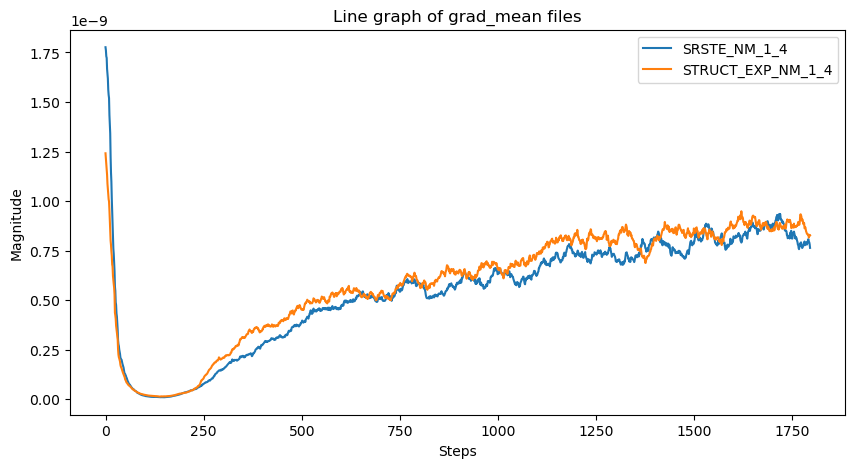

In [45]:
get_plot_for_column(6)

In [30]:
df = pd.read_csv("vit_model_stats_grad_sad_weights/STRUCT_EXP_NM_1_4/model_stats.csv")

In [31]:
df.columns

Index(['step_num', 'mean_sparse_module.blocks.0.mlp.fc1.weight',
       'std_sparse_module.blocks.0.mlp.fc1.weight',
       'l2_norm_module.blocks.0.mlp.fc1.weight',
       'linf_norm_module.blocks.0.mlp.fc1.weight',
       'SAD_L1_module.blocks.0.mlp.fc1.weight',
       'SAD_L2_module.blocks.0.mlp.fc1.weight',
       'mean_sparse_module.blocks.0.mlp.fc2.weight',
       'std_sparse_module.blocks.0.mlp.fc2.weight',
       'l2_norm_module.blocks.0.mlp.fc2.weight',
       'linf_norm_module.blocks.0.mlp.fc2.weight',
       'SAD_L1_module.blocks.0.mlp.fc2.weight',
       'SAD_L2_module.blocks.0.mlp.fc2.weight',
       'mean_sparse_module.blocks.1.mlp.fc1.weight',
       'std_sparse_module.blocks.1.mlp.fc1.weight',
       'l2_norm_module.blocks.1.mlp.fc1.weight',
       'linf_norm_module.blocks.1.mlp.fc1.weight',
       'SAD_L1_module.blocks.1.mlp.fc1.weight',
       'SAD_L2_module.blocks.1.mlp.fc1.weight',
       'mean_sparse_module.blocks.1.mlp.fc2.weight',
       'std_sparse_module.blocks